
# Demo: Generic Supervised Machine Learning Pipeline



### set up environment

In [76]:
# import modules and classes

import os, sys, shutil, getpass
import pprint, logging, datetime
import stat

import numpy   as np
import pandas  as pd
import seaborn as sns

In [77]:
# define path of jupyter notebook, and code and data directories relative to it

dir_MASTER = ".."
dir_code   = os.path.join(dir_MASTER, "code")
dir_data   = os.path.join(dir_MASTER, "data")

In [78]:
# check dir_code has been set correctly

print(os.listdir(dir_code))

['__init__.py', '__pycache__', 'examineData.py', 'PipelinePreprocessHousingData.py', 'splitTrainTest.py', 'trainEvaluate.py', 'trainEvaluateGrid.py', 'visualizeData.py']



## California 1990 "census block group" housing data

In [79]:
# load California housing

housingFILE = os.path.join(dir_data,'housing.csv')
housingDF   = pd.read_csv(housingFILE);

In [80]:
# basic info on housingDF

housingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [81]:
# view first several rows of housingDF

housingDF.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


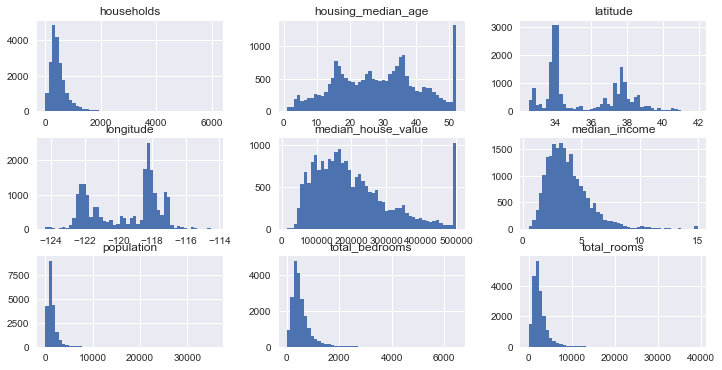

In [82]:
# histograms on the nine continuous variables

import matplotlib.pyplot as plt
myHistogram = housingDF.hist(bins = 50, figsize = (12,6))
plt.show()

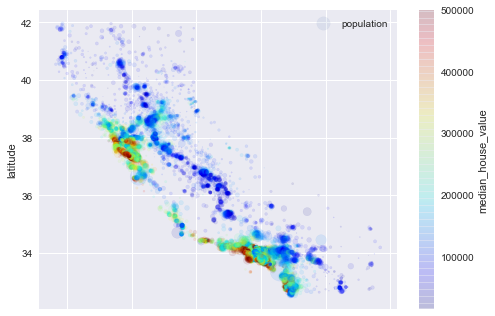

In [83]:
myPlot = housingDF.plot(
    label    = 'population',
    kind     = 'scatter',
    x        = 'longitude',
    y        = 'latitude',
    s        = housingDF["population"] / 100,
    c        = 'median_house_value',
    cmap     = plt.get_cmap("jet"),
    colorbar = True,
    alpha    = 0.1
    )
plt.show()

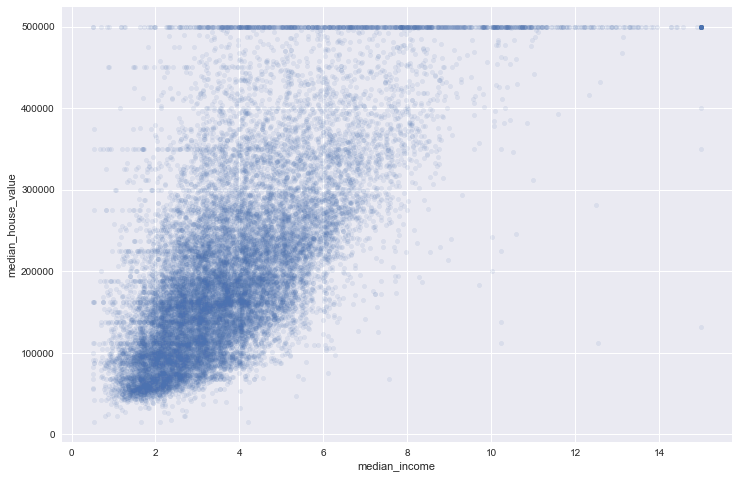

In [84]:
myPlot = housingDF.plot(
    kind    = 'scatter',
    x       = "median_income",
    y       = "median_house_value",
    alpha   = 0.1,
    figsize = (12,8)
    )
plt.show()

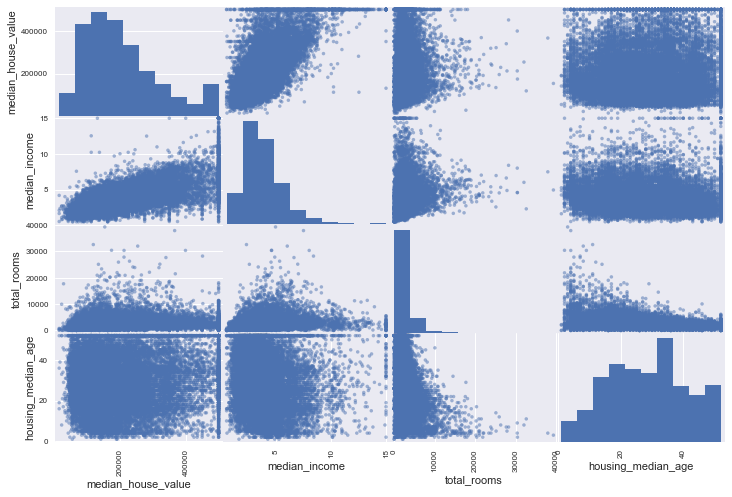

In [85]:
from pandas.plotting import scatter_matrix
corrMatrix = housingDF.corr()
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
myPlot = scatter_matrix(frame=housingDF[attributes], figsize=(12,8))
plt.show()


## Custom-built module: splitTrainTest.py
Split data into training and testing sets

In [86]:
########################################################
#
# source code for the Python module: splitTrainTest.py
#
########################################################

# import numpy as np
#
# import importlib
# from   importlib.util import find_spec
# ms_spec = importlib.util.find_spec(name="sklearn.model_selection")
# if ms_spec is not None:
#     from sklearn.model_selection import train_test_split
#     from sklearn.model_selection import StratifiedShuffleSplit
# else:
#     from sklearn.cross_validation import train_test_split
#
# def splitTrainTest(inputDF,random_state):
#
#     ms_spec = importlib.util.find_spec(name="sklearn.model_selection")
#     if ms_spec is None:
#         trainSet, testSet = train_test_split(inputDF, test_size=0.2, random_state=random_state)
#     else:
#         inputDF["income_category"] = np.ceil(inputDF["median_income"]/1.5)
#         inputDF["income_category"].where( inputDF["income_category"] < 5.0 , 5.0, inplace = True )
#
#         split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=19)
#         for trainIndices, testIndices in split.split(inputDF,inputDF["income_category"]):
#             trainSet = inputDF.loc[trainIndices]
#             testSet  = inputDF.loc[testIndices]
#
#         print('\nincome category relative sizes (whole data set)')
#         print(   inputDF["income_category"].value_counts() / len(inputDF) )
#
#         for set in (trainSet,testSet):
#             set.drop(["income_category"],axis=1,inplace=True)
#
#     ### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ###
#     return( trainSet , testSet )
#

In [87]:
# view again the contents of the code directory dir_code

print(os.listdir(dir_code))

['__init__.py', '__pycache__', 'examineData.py', 'PipelinePreprocessHousingData.py', 'splitTrainTest.py', 'trainEvaluate.py', 'trainEvaluateGrid.py', 'visualizeData.py']


In [88]:
# add code directory to system path
# (so that preceding custom-built Python modules become available)

sys.path.append(dir_code)

In [89]:
# split into training and testing data sets in a stratified manner

from splitTrainTest import splitTrainTest
trainSet, testSet = splitTrainTest(inputDF = housingDF, random_state = 19)


income category relative sizes (whole data set)
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_category, dtype: float64


In [90]:
print(housingDF.shape)
print(trainSet.shape)
print(testSet.shape)

(20640, 11)
(16512, 10)
(4128, 10)


In [91]:
housingDF.info()
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
income_category       20640 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 8663 to 7054
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16336 non-null float64
populati


## Custom-built module: PipelinePreprocessHousingData.py

In [92]:
# Preprocessing:
#   1)  median imputation for continuous variables
#   2)  add two derived variables: number of rooms per household, population per household
#   3)  binarize the categorical variable: ocean_proximity (replace it with a collection of binary indicators)

from PipelinePreprocessHousingData import PipelinePreprocessHousingData
preprocessedTrainSet = PipelinePreprocessHousingData.fit_transform(
    trainSet.drop(["median_house_value"],axis=1)
    )

In [93]:
print(type(preprocessedTrainSet))
preprocessedTrainSet[0:3,]

<class 'numpy.ndarray'>


array([[ 0.59311284, -0.84368509,  0.91777934,  0.19522684,  0.07694854,
        -0.14480532,  0.01372209,  0.68219324,  0.27712397, -0.09712907,
        -0.42595431,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.09212684, -1.13781385, -0.91562623, -0.35121612,  0.10330353,
        -0.12355599, -0.19581394, -1.01636674, -0.44156162,  0.00596612,
         1.46978359,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 1.29173244, -1.35257454, -0.91562623,  0.59509667,  0.73103156,
         0.5024137 ,  0.6947142 , -0.61817454, -0.12078124, -0.0762501 ,
         0.0045411 ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])


## Custome-built module: trainEvaluate.py
preprocessing + training + testing (cross validation + test data)

In [94]:
########################################################
#
# source code for the Python module: trainEvaluate.py
#
########################################################

# import numpy as np
# from sklearn.metrics import mean_squared_error

# import importlib
# from importlib.util import find_spec
# ms_spec = importlib.util.find_spec(name="sklearn.model_selection")
# if ms_spec is not None:
#     from sklearn.model_selection import cross_val_score
# else:
#     from sklearn.cross_validation import cross_val_score
#
# def trainEvaluate(trainData, testData, trainedPreprocessor, myModel, modelName):
#
#     preprocessedTrainData = trainedPreprocessor.transform(
#         trainData.drop(["median_house_value"],axis=1)
#         )
#
#     myModel.fit(X = preprocessedTrainData, y = trainData["median_house_value"])
#     myPredictions = myModel.predict(X = preprocessedTrainData)
#
#     myTrainMSE  = mean_squared_error(myPredictions,trainData["median_house_value"])
#     myTrainRMSE = np.sqrt(myTrainMSE)
#
#     ### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ###
#     nFold =10
#
#     CVScores = cross_val_score(
#         estimator = myModel,
#         X         = preprocessedTrainData,
#         y         = trainData["median_house_value"],
#         scoring   = "neg_mean_squared_error",
#         cv        = nFold
#         )
#     CVRMSE = np.sqrt( - CVScores )
#
#     ### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ###
#     preprocessedTestData = trainedPreprocessor.transform(
#         testData.drop(["median_house_value"],axis=1)
#         )
#
#     myPredictions = myModel.predict(X = preprocessedTestData)
#
#     myTestMSE  = mean_squared_error(myPredictions,testData["median_house_value"])
#     myTestRMSE = np.sqrt(myTestMSE)
#
#     ### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ###
#     print("\n### ~~~~~~~~~~~~~~~~~~~~ ###")
#     print("###  " + modelName)
#
#     print("\nTrain RMSE: " + str(myTrainRMSE))
#
#     print("\nCV RMSE (" + str(nFold) + "-fold):")
#     print(CVRMSE)
#     print("\nCV RMSE (mean): " + str(CVRMSE.mean()) )
#     print("\nCV RMSE (std): "  + str(CVRMSE.std())  )
#
#     print("\nTest RMSE: " + str(myTestRMSE))
#
#     ### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ###
#     return( None )
#


## trainEvaluate( LinearRegression , RegressionTree , RandomForest )

In [95]:
# import the custom-built trainEvaluate module

from trainEvaluate import trainEvaluate

In [96]:
# import Scikit-learn's LinearRegression classs
from sklearn.linear_model import LinearRegression

# instantiate a LinearRegression object
myLinearModel = LinearRegression()

# train and evaluate a linear model (this underfits the data)
trainEvaluate(
    trainData           = trainSet,
    testData            = testSet,
    trainedPreprocessor = PipelinePreprocessHousingData,
    myModel             = myLinearModel,
    modelName           = "Linear Model"
    )


### ~~~~~~~~~~~~~~~~~~~~ ###
###  Linear Model

Train RMSE: 68205.5245154

CV RMSE (10-fold):
[ 71216.30938995  69374.24757249  69744.15111082  67634.72605826
  67556.95118003  70447.0948898   66602.78109188  67053.6825131
  69152.900413    68090.74548673]

CV RMSE (mean): 68687.3589706

CV RMSE (std): 1450.99222303

Test RMSE: 68763.2267712


In [97]:
# regression tree (this overfits the data: zero MSE)

from sklearn.tree import DecisionTreeRegressor
myRegressionTreeModel = DecisionTreeRegressor()
trainEvaluate(
    trainData           = trainSet,
    testData            = testSet,
    trainedPreprocessor = PipelinePreprocessHousingData,
    myModel             = myRegressionTreeModel,
    modelName           = "Regression Tree"
    )


### ~~~~~~~~~~~~~~~~~~~~ ###
###  Regression Tree

Train RMSE: 0.0

CV RMSE (10-fold):
[ 73555.04483626  71632.49869337  70716.75204845  71509.423657
  68184.37706857  70953.40314486  72396.5461874   73774.76421057
  65544.46465602  67666.65213249]

CV RMSE (mean): 70593.3926635

CV RMSE (std): 2531.17345608

Test RMSE: 69753.6148777


In [98]:
# random forest

from sklearn.ensemble import RandomForestRegressor
myRandomForestModel = RandomForestRegressor()
trainEvaluate(
    trainData           = trainSet,
    testData            = testSet,
    trainedPreprocessor = PipelinePreprocessHousingData,
    myModel             = myRandomForestModel,
    modelName           = "Random Forest"
    )


### ~~~~~~~~~~~~~~~~~~~~ ###
###  Random Forest

Train RMSE: 22260.3519559

CV RMSE (10-fold):
[ 51862.25456299  54318.58495675  55525.4549455   52676.92406333
  51923.81372512  55165.34284078  53060.88378789  51655.94758761
  49065.64621799  53329.08063012]

CV RMSE (mean): 52858.3933318

CV RMSE (std): 1804.4226558

Test RMSE: 51969.3228342



## Custom-build module: trainEvaluateGrid.py
preprocessing + training + hyperparameter tuning (via k-fold cross validation) + testing

In [99]:
from trainEvaluateGrid import trainEvaluateGrid


## trainEvaluateGrid( RandomForest )

In [100]:
# random forest with hyperparameter tuning via grid search

import importlib
from importlib.util import find_spec

ms_spec = importlib.util.find_spec(name="sklearn.model_selection")
if ms_spec is not None:
    from sklearn.model_selection import GridSearchCV
else:
    from sklearn.grid_search import GridSearchCV

# instantiate random forest regressor
from sklearn.ensemble import RandomForestRegressor
newRandomForestModel = RandomForestRegressor()

parameterGrid = [
    { 'n_estimators':[3,10,30], 'max_features':[2,4,6,8]                     },
    { 'n_estimators':[3,10],    'max_features':[2,3,4],  'bootstrap':[False] }
    ]

gridSearch = GridSearchCV(
    estimator  = newRandomForestModel,
    param_grid = parameterGrid,
    scoring    = "neg_mean_squared_error",
    cv         = 5
    )

trainEvaluateGrid(
    trainData           = trainSet,
    testData            = testSet,
    trainedPreprocessor = PipelinePreprocessHousingData,
    myModel             = gridSearch,
    modelName           = "Random Forest, Cross Validation, Grid Search"
    )


### ~~~~~~~~~~~~~~~~~~~~ ###
###  Random Forest, Cross Validation, Grid Search

Train RMSE: 19319.1699951

(Cross Validation, Grid Search) RSME:
63613.8722966 {'max_features': 2, 'n_estimators': 3}
54887.4786997 {'max_features': 2, 'n_estimators': 10}
52492.0929503 {'max_features': 2, 'n_estimators': 30}
60733.8985581 {'max_features': 4, 'n_estimators': 3}
52971.0097577 {'max_features': 4, 'n_estimators': 10}
50406.8079061 {'max_features': 4, 'n_estimators': 30}
59644.6025792 {'max_features': 6, 'n_estimators': 3}
52364.3429745 {'max_features': 6, 'n_estimators': 10}
50021.6696362 {'max_features': 6, 'n_estimators': 30}
58528.3035971 {'max_features': 8, 'n_estimators': 3}
52715.7548092 {'max_features': 8, 'n_estimators': 10}
50259.253025 {'max_features': 8, 'n_estimators': 30}
61753.840287 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53823.5652018 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58942.820412 {'bootstrap': False, 'max_features': 3, 'n_estimator